In [11]:
import matplotlib.pyplot as plt
from metpy.plots import USCOUNTIES
from cartopy import crs as ccrs
from cartopy.io.img_tiles import GoogleTiles, OSM, Stamen
import cartopy.feature as cfeature
import pygrib
import xarray as xr
import numpy as np

In [12]:
grib_messages = pygrib.open('ds.snow.bin')
grib_messages.seek(0)

for message in grib_messages:
    print(message)


1:Total snowfall:m (accum):lambert:surface:level 0:fcst time 0-6 mins (accum):from 202102151430
2:Total snowfall:m (accum):lambert:surface:level 0:fcst time 210-570 mins (accum):from 202102151430
3:Total snowfall:m (accum):lambert:surface:level 0:fcst time 570-930 mins (accum):from 202102151430
4:Total snowfall:m (accum):lambert:surface:level 0:fcst time 930-1290 mins (accum):from 202102151430
5:Total snowfall:m (accum):lambert:surface:level 0:fcst time 1290-1650 mins (accum):from 202102151430
6:Total snowfall:m (accum):lambert:surface:level 0:fcst time 1650-2010 mins (accum):from 202102151430
7:Total snowfall:m (accum):lambert:surface:level 0:fcst time 2010-2370 mins (accum):from 202102151430
8:Total snowfall:m (accum):lambert:surface:level 0:fcst time 2370-2730 mins (accum):from 202102151430
9:Total snowfall:m (accum):lambert:surface:level 0:fcst time 2730-3090 mins (accum):from 202102151430
10:Total snowfall:m (accum):lambert:surface:level 0:fcst time 3090-3450 mins (accum):from 202

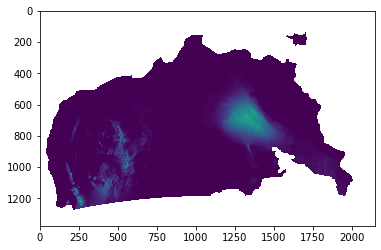

In [26]:
grib_message = grib_messages[2]
plt.imshow(grib_message.values)
snow_values = grib_message.values

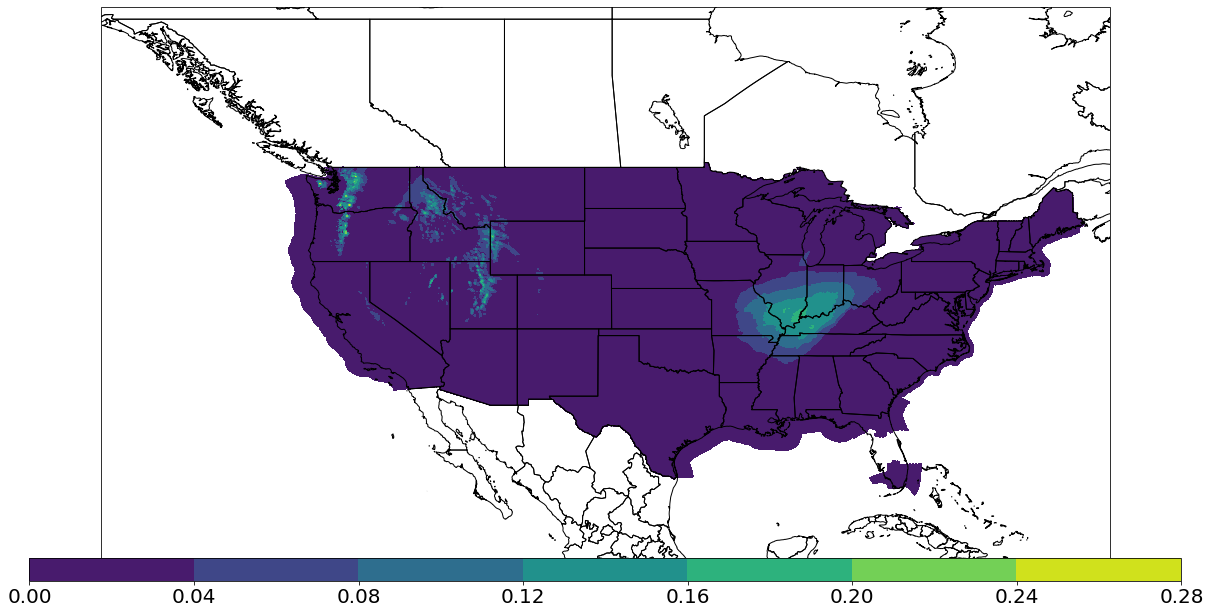

In [32]:
lats, lons = grib_message.latlons()
data_crs = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([0, 0, 1, 1], projection=data_crs)
ax.set_extent([-140, -65, 20, 55])
ax.add_feature(cfeature.STATES.with_scale('10m'))
contour_fill = ax.contourf(lons, lats, snow_values, transform=data_crs)

cbar = plt.colorbar(contour_fill, orientation='horizontal', pad=0, aspect=50)
cbar.ax.tick_params(labelsize=20)

plt.savefig('snow.png', dpi=72)